# Неделя 8. Кластеризация
## Практическая работа

Импортируем нужные библиотеки

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN, KMeans

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

### Ирисы Фишера

Загрузим датасет: Ирисы Фишера

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.shape

(150, 4)

In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [27]:
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [28]:
scaled_data.mean(axis=0)

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [10]:
pca = PCA()
data_comp = pca.fit_transform(scaled_data)

In [11]:
data_comp.shape

(150, 4)

In [12]:
pca.explained_variance_ratio_[:2]

array([0.72962445, 0.22850762])

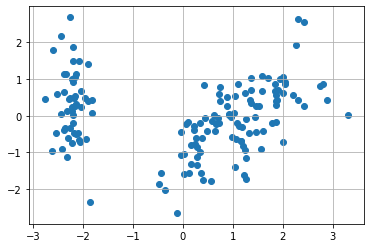

In [13]:
plt.scatter(data_comp[:, 0], data_comp[:, 1])
plt.grid()

KMeans Clustering

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [15]:
kmeans.fit(scaled_data)
clusters = kmeans.predict(scaled_data)

clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [16]:
kmeans.cluster_centers_

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [17]:
clstr_centers_comp = pca.transform(kmeans.cluster_centers_)
clstr_centers_comp.shape

(3, 4)

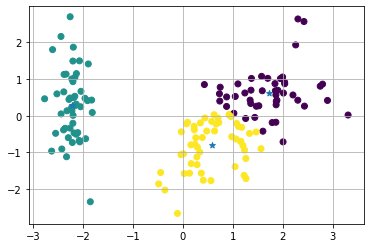

In [18]:
plt.scatter(data_comp[:, 0], data_comp[:, 1], c=clusters)
plt.scatter(clstr_centers_comp[:,0], clstr_centers_comp[:, 1], marker='*')
plt.grid()

In [19]:
kmeans.inertia_

139.82049635974982

Подбор k

In [20]:
inertia = []
ks = [1,2,3,4,5,6,7,8,9,10,11,12,13]

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

Text(0.5, 0, 'k')

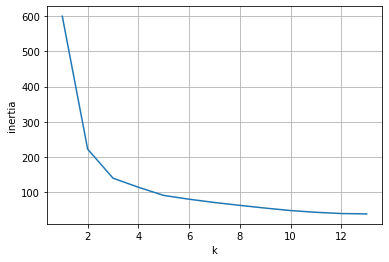

In [21]:
plt.plot(ks, inertia)
plt.ylabel('inertia')
plt.grid()
plt.xlabel('k')

Оценка качества

In [22]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, silhouette_samples

In [23]:
silhouette_samples = silhouette_samples(scaled_data, clusters)

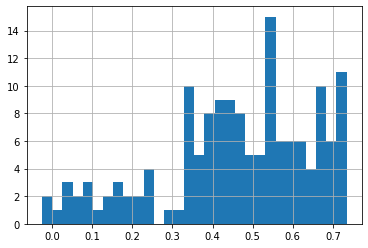

In [24]:
plt.hist(silhouette_samples, bins=30)
plt.grid()

In [29]:
mean_s = []
ks = [2,3,4,5,6,7,8,9,10,11,12,13]

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    mean_s.append(np.mean(silhouette_samples(scaled_data, clusters)))

TypeError: 'numpy.ndarray' object is not callable

In [30]:
adjusted_rand_score(iris.target,clusters)

0.5681159420289855

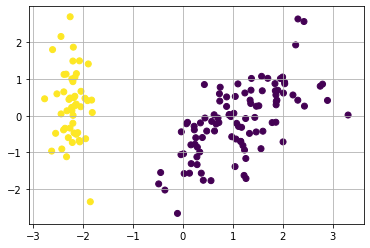

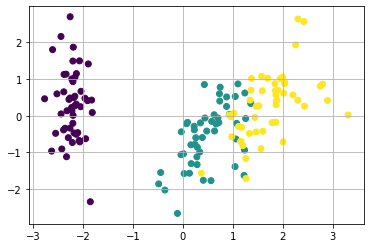

In [31]:
plt.scatter(data_comp[:, 0], data_comp[:, 1], c=clusters)
plt.grid()

plt.figure()
plt.scatter(data_comp[:, 0], data_comp[:, 1], c=iris.target)
plt.grid()

In [ ]:
kmeans_clusters = clusters.copy()

In [ ]:
dbscan = DBSCAN(eps=1)
dbscan_clusters = dbscan.fit_predict(scaled_data)

In [ ]:
dbscan_clusters

In [ ]:
plt.title('kmeans')
plt.scatter(data_comp[:, 0], data_comp[:, 1], c=clusters)
plt.grid()

plt.figure()
plt.title('dbscan')
plt.scatter(data_comp[:, 0], data_comp[:, 1], c=dbscan_clusters)
plt.grid()

### Boston house-prices

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [ ]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data.shape

In [ ]:
data.head()

HDBSCAN